## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read a dataset file
df = pd.read_csv('ab_data.csv')
# Display the top few rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Finding the number of rows and columns in the dataset, respectively.
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# To get the number of unique user_id. 
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# To find the propotion of users converted (using 'converted' column)
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# To find the total number of times the new_page and treatment don't line up and 
# the number of the times the old_page and treatment don't line up.
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

In [7]:
# Another method: doing the brevious in these three steps:
#first, find the number of times the new_page and treatment don't line up (only)
group_1 = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
group_1

1965

In [8]:
# Second, find the number of the times the old_page and treatment don't line up (only).
group_2 = df.query("group == 'control' and landing_page == 'new_page'").shape[0]
group_2

1928

In [9]:
# Third: adding the two groups together, should be:3893 (1965 + 1928)
group_1 + group_2

3893

f. Do any of the rows have missing values?

In [10]:
# Finding the rows have the null (missing) values.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**No column has the null (missing) values.**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Removing the rows where 'treatment' is not aligned with 'new_page' 
# or 'control' is not aligned with 'old_page' as the answer to the quiz 2.
df = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)

**Code frome [stackoverflow](https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value)**

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

0

In [13]:
# Displaying the number of rows and columns in the dataset respectively, after removing.
df.shape

(290585, 5)

In [14]:
# Storing the new dataset in new dataframe (df2) 
df.to_csv('df2.csv', index = False)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
# First: Reading the df2 to use it and display how many rows and columns?
df2 = pd.read_csv("df2.csv")
df2.shape

(290585, 5)

In [16]:
# To know How many unique user_ids are in df2?
df2.user_id.duplicated().sum()

1

**That means one row was repeated in the dataframe (df2).**

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
# Selecting and displaying the repeated row in 'user_id' column
df2[df2.user_id.duplicated()].iloc[:,0:1]

,user_id
2862,773192


**Code frome [stackoverflow](https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe)**

c. What is the row information for the repeat **user_id**? 

In [18]:
# Displaying information about repeated row (user_id)
repeated_user = df2[df2.user_id.duplicated()]
repeated_user.head()

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# Removing duplicated row (index no = 2862)
df2 = df2.drop([2862])

**Code frome [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)**

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
# Finding the probability of an individual converting 
#(No.of conversions / total no. of individuals) regardless of the page they receive.
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
# Finding the probability of converted individual was in 'control' group.
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
# Finding the probability of converted individual was in 'treatment' group.
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
# Finding the probability of individual received the new page 
# (No. of received new_page / total no. of df2)
df2[df2['landing_page'] == 'new_page'].shape[0] / df.shape[0]

0.5000602233425676

In [24]:
# To know the time interval that our data lies between it. (Duration of experiment)
df.timestamp.min(), df.timestamp.max()

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

**The dataset started on Jan 2, 2017 till Jan 24, 2017 (22 days).**

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

### **My response:**

**When looking at the D answer only, in a short time (22 days), about half of the users of the old_page were converted to the new_page (0.00158 increasing in favor of New page) which indicates the quality of the new_page. But, when we consider the answer in C, we found 11.8% approximatlly converted after using the new_page in 22 days, this is  _Simpson's paradox_. In the end, the short duration makes us do not judge the new_page now and misleading decision on it. When we consider "novelty effect" also which is existing users may give an unfair advantage to the new_page which appear in both C answer and D answer.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### **The Hypotheses:**

**I'll put the null hypothesis when there is the difference between converted rate of new page is smaller than or equale to the converted rate of old page.**
# **$$H_0:  p_{new}  \leq  p_{old}$$**
# **$$H_1:  p_{new}  >  p_{old}$$**
**We can rearrange our hypotheses to look like this:**
# **$$H_0:  p_{new} - p_{old} \leq   0$$**
# **$$H_1:  p_{new} - p_{old} >  0$$**
**Type I error rate of 5%:**
### **$$\alpha = 0.05$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
# To find proportion of the converted rate for new page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
# To find proportion of the converted rate for new page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [27]:
# Finding the landing page which is new page.
new_page_df = df2.query('landing_page == "new_page"')

In [28]:
# Puting the result (n) in variable 'n_new' to find the number of it.
n_new = new_page_df.shape[0]
# Printing the 'n_new' to know the number of record.
n_new

145310

d. What is $n_{old}$?

In [29]:
# Finding the landing page which is old page.
old_page_df = df2.query('landing_page == "old_page"')

In [30]:
# Puting the result (n) in variable 'n_new' to find the number of it.
n_old = old_page_df.shape[0]
# Printing the 'n_new' to know the number of record.
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
# Simulating the converted column (data) of new page using random choice 
# with probability equals pnew
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
# To check values
new_page_converted.mean()

0.11892505677517033

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
# Simulating the converted column (data) of old page using random choice 
# with probability equals pold
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
# To check values
old_page_converted.mean()

0.12026928424907417

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
# The difference between converted new_page mean and converted old page mean
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.0013442274739038362

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [34]:
# Simulating the difference between the means of converted new page and 
# converted old page and repeate  it 10000 iterations to get normal distribution
# of the mean differnece according to central limit theorem
p_diffs = []
for _ in range(10000):
    new_page_conv = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
    old_page_conv = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
    p_diffs.append(new_page_conv.mean() - old_page_conv.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

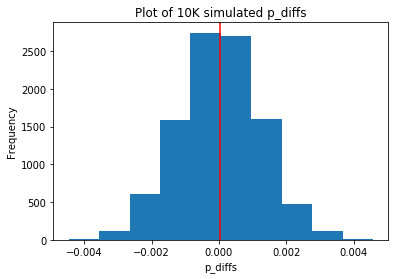

In [35]:
# Plotting a histogram of the p_diffs with its mean.
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs')
plt.axvline(x= np.array(p_diffs).mean(), color='r');

**Comment: Yes, I expected to be normal distribution because the bootstrap of mean differences always gives a result of normal distribution based on central limit theorem.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
# Calculating of the actual difference between converted mean according the page.
actual_diff = df2.query('landing_page == "new_page"').converted.mean() - df2.query('landing_page == "old_page"').converted.mean()
actual_diff

-0.0015782389853555567

In [37]:
# converting p_diffs list to numpy array.
p_diffs = np.array(p_diffs)
p_diffs

array([  6.17205736e-04,   1.24356221e-03,   3.91005775e-05, ...,
        -3.94371705e-04,  -5.04946409e-05,  -6.00884853e-04])

In [38]:
# Calculating the proportion of the p_diffs. 
p_val = (p_diffs > actual_diff).mean()
p_val

0.90510000000000002

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### **The answer:**

**1- In part j we computed proportion of the p_diffs are greater than the actual difference**

**2- This value is called in scientific studies the "p-value" which is defined as "the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true."**

**3- Since p_val > alpha = (0.905 > 0.05) "One sided alpha value because H1:  p_new - p_old >  0" , therefore this value means based on the data we fail to reject the null hypothesis.**

**4- To be sure of the previous conclusion the next visualizations show that the actual_diff mean (green line) lies in the region of H0 acceptance which is left of the upper_bound (red line).**

In [39]:
# To calculate upper bound when Type I error rate of 5% (alpha = .05)
upper_bound = np.percentile(p_diffs, 95)
upper_bound

0.0019806149627358111

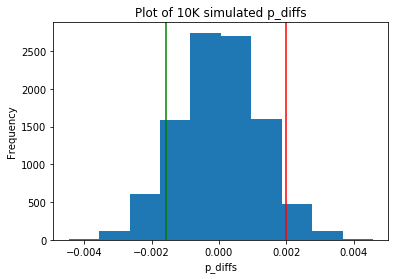

In [40]:
# Plotting a histogram of the p_diffs with upper bound (red line) 
# and p_diffs (green line)
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs')
plt.axvline(x=upper_bound, color='r');
plt.axvline(x=actual_diff.mean(), color='green');

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm
# Preparing data for calculating z-score and p-value
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
# Calculating z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [43]:
from scipy.stats import norm
# Tells us how significant our z-score is
norm.cdf(z_score)

0.094941687240975514

In [44]:
# Tells us what our critical value at 95% confidence is
norm.ppf(1-0.05)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### **The answer:**

**1- z-score value (-1.310924) which is smaller than the critical z-score value (1.6448) so we fail to reject the Null hypothesis because z-score lies in H0 acceptance region.**

**2- p-value computed by (stats.proportions_ztest) is the same p-value computed above so since  p_val > alpha = (0.905 > 0.05) therefore we also we fail to reject the null hypothesis H0 based on the data**


**3- Both z-score & p-value agrees with the findings in parts j. and k.**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### **The answer:**

The type of regression should I performing is _**"Logistic Regression"**_ because the converted column has only two values (0, 1).


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
# Display the top few rows
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [46]:
# Represent 'group' column as dummy variables to convert it to (0,1) data
df2[['control','treatment']] = pd.get_dummies(df2['group'])
# delete 'control' column because it doesn't give extra information
df2 = df2.drop('control', axis=1)
# rename 'treatment' to 'ab_page'
df2.rename(columns={'treatment': 'ab_page'}, inplace=True)
# Display the top few rows
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [47]:
# Instantiating the logistic Regression model where 'converted' is response 
# variable and 'ab_page' is explanatory variable.
df2['intercept'] = 1   # initializing 'intercept' with ones.
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [48]:
# Displaying the results 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:18:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [49]:
# Exponentiate the coefficients to interpret the result as it is logistic regression 
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

### **Comment:**

**According to the results of logistic model we can interpret it as for each one new page in 'ab_page' conversion is 0.985123 times as likely holding all else constant**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### **The answer:**

**p-value associated with ab_page = 0.190 (0.190 > 0.025) which is different from the value found in Part II = 0.9 (0.9 > 0.05) but it gives the same inference as in Part II where in both cases p-value bigger than Alpha (Type-1 error).**

**p-value differs from the value found in the Part II (A/B test) because hypothesis in Part II is one-tailed test (alterantive is "bigger than") but hypothesis in Part III (Regression) is two-tailed hypothesis (alternative is "not equal") which is no directional component.**

**The Regression hypothesis is:**
### **$$H_0:  p_{new}  =  p_{old}$$**
### **$$H_1:  p_{new}  \neq  p_{old}$$**
**We can rearrange our hypotheses to look like this:**
### **$$H_0:  p_{new} - p_{old} =   0$$**
### **$$H_1:  p_{new} - p_{old} \neq  0$$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The answer:**


**1- I think that if timestamp is taken to consideration it will influence an individual converts to identify the time interval which has the most conversions from old page to new page or vice versa.**

**2- Advantages of adding additional terms into the regression model:**

    a- We now can use both quantitative and categorical x-variables
    to predict a quantitative response using the dummy variables trick.

    b- We can interpret each coefficient associated with each variable
    as the predicted increase in the response for every one unit increase
    in the explanatory variable, holding all other variables in the model 
    constant.

**3- Disadvantages of adding additional terms into the regression model:**

    a. A linear relationship doesn't exist.

    b. Correlated errors.

    c. Non-constant variance.

    d. Outliers.

    e. Multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [50]:
# Reading the countries dataset file
countries_df = pd.read_csv('countries.csv')
# Joing  countries file with our df2 and put them in 'df_new' file
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# To know how many country and the number of rows in each? 
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [51]:
# Displaying a few rows of the file
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [52]:
# Create the necessary dummy variables. We need two columns (UK, US) for the three dummy varaibles
df_new[['UK', 'US']] = pd.get_dummies(df_new['country'])[['UK','US']]
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [53]:
# Instantiating the logistic Regression model where 'converted' is response 
# variable and 'ab_page','UK' and 'US' are explanatory variables.
df_new['intercept'] = 1
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:18:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [54]:
# Exponentiate the coefficients to interpret the result as it is logistic regression 
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

### **Comment:**

**According to the results of logistic model we can interpret it as for each one new page in 'ab_page' conversion is 0.985168 times as likely holding all else constant**

**Therefore which means that adding new variables to logistic model doesn't influence the factor of 'ab_page', as well as p_values.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
# Interaction between 'ab_page' and 'US' country
df_new['ab_page_us'] = df_new['ab_page'] * df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,ab_page_us
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0


In [56]:
# After the interaction the model is instantiated where 'converted' is response 
# variable and 'ab_page','UK', 'US' and 'ab_page_us' are explanatory variables
df_new['intercept'] = 1
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'ab_page_us']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Sat, 22 Dec 2018   Pseudo R-squ.:               2.589e-05
Time:                        11:18:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2390
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0366      0.028    -72.618      0.000      -2.092      -1.982
ab_page       -0.0018      0.021     -0.086      0.931      -0.043       0.039
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0501      0.030      1.691      0.091      -0.008       0.108
ab_page_us    -0.0188      0.025     -0.752      0.452      -0.068       0.030
==============================================================================
"""

In [57]:
# Exponentiate the coefficients to interpret the result as it is logistic regression 
np.exp(results.params)

intercept     0.130468
ab_page       0.998202
UK            1.052017
US            1.051427
ab_page_us    0.981411
dtype: float64

### **Comment After Interaction:**

**According to the results after interaction between page and country of logistic model we can interpret it as for each one new page in 'ab_page' conversion is 0.99820 times as likely holding all else constant**

**Therefore which means that interaction between page and country (US) to logistic model doesn't influence the factor of 'ab_page', but p_value of ab_page increased by very large value from (0.191 to 0.931).**

## **Final Conclusions:**
**Through studying the 3 steps of this project we can summarize our conclusion as follows:**

>### **Part I - Probability:**

>**If the statistical results is not interpreted accurately it will mislead us and lead us to wrong analysis and decisions for example (Simpson's Paradox).**

>### **Part II - A/B Test**

>**In the hypothesis test we fail to reject the null hypothesis where statistically old page conversion rate is better than or equal to the new page conversion rate.**

>### **Part III - A regression approach**

>**Logistic regression is used because the response variable 'converted' has (0 or 1) or (True/False) values and the regression results agrees with A/B test results. Adding extra variable like 'country' doesn't influence or add some thing useful to the regression model as shown above in the results.**

>### **Final conclusion and decisions**

>**According to the previous 3 stages analysis we did not found clear statistical significance between the old page and the new page but if we take practical significance into considerations the duration of the test which is 22 days is too short to find a statistical significance therefore the test of significance should take enough period of time for example (6 months) to find clear statistical or practical significance to take decision to run the new page or to stop it.**

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0